#### 1) import the datafile from [UCI repo](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',
                 names = ['variance', 'skewness', 'curtosis', 'entropy', 'Class'], header = None)
df.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### 2) Check the presence of null values, shape of the data and datatypes of the attributes

In [13]:
df.shape

(1372, 5)

In [14]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
Class      int64
dtype: object

In [16]:
df.isnull()

,V1,V2,V3,V4,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


#### 3) Find the class distribution of the dataset

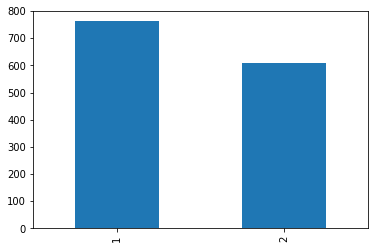

In [19]:
df.Class.value_counts().plot(kind = 'bar')
plt.show()

In [2]:
df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

#### 4) Assume  0 means a real note and 1 means a forged note, replace the 0, 1 in the 'Class' variable with 'Real', 'Fake' respectively

In [3]:
df.Class.replace({0:'Real', 1:'Fake'}, inplace = True)

#### 5) Print the descriptive stats of the variables

In [4]:
df.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


#### 6) Display a pairplot and use the Class variable to color the data points

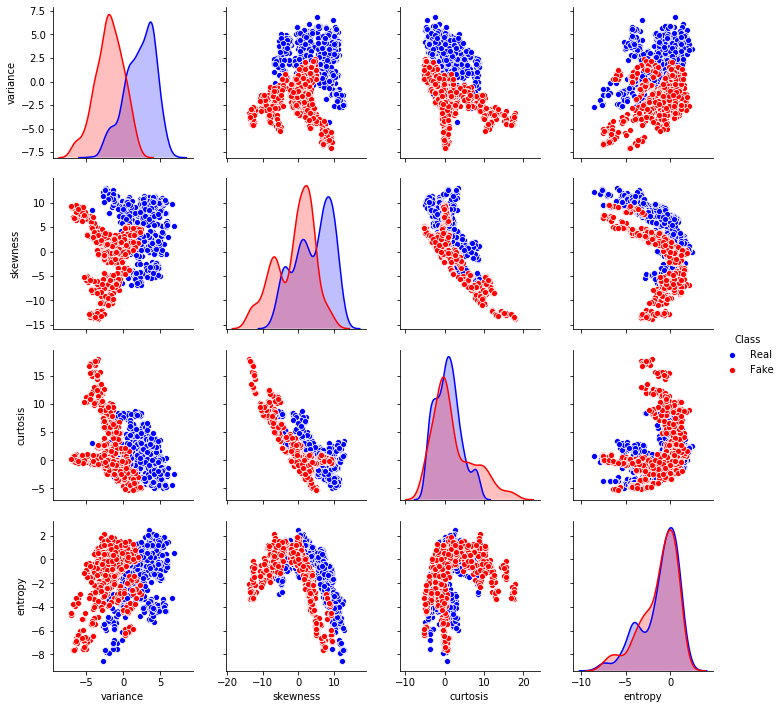

In [8]:
sns.pairplot(df, hue = 'Class', diag_kind= 'kde', palette = ['blue', 'red'])
plt.show()

#### 7) Display a correlation heatmap

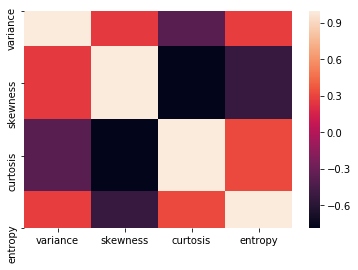

In [10]:
sns.heatmap(df.corr())
plt.show()

#### 8) Seperate the 'Class' variable from the others   (i.e, Dependant and independant)

In [14]:
X = df.drop('Class', axis=1)
y = df[['Class']]

#### 9) Split the data into train and test sets

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### 10) Fit a Decision tree, Bagging, Boosting and Random forest models using the train data (you can use the default hyperparameters for this exercise)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

Decision_Tree = DecisionTreeClassifier()
Bagging = BaggingClassifier()
Random_Forest = RandomForestClassifier()

Decision_Tree.fit(X_train, y_train)
Bagging.fit(X_train,y_train)
Random_Forest.fit(X_train,y_train)

C:\Users\dsharma\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dsharma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dsharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 11) Display a dataframe which shows the accuracy values of the three models on the test data

In [27]:
Result_Decision_Tree = Decision_Tree.score(X_test,y_test)
Result_Bagging = Bagging.score(X_test,y_test)
Result_Random_Forest = Random_Forest.score(X_test,y_test)


In [28]:
print(Result_Decision_Tree)
print(Result_Bagging)
print(Result_Random_Forest)

0.9830097087378641
0.9951456310679612
0.9975728155339806
